In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [42]:
data = pd.read_csv("amazon_sales_large_corrupted.csv")

In [43]:
data = pd.eval("New_discount = data.Discount + 0.1",target = data)
data = pd.eval("Profit_After = data.Profit * (1-data.New_discount/100)",target = data)
data

,Order ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit,New_discount,Profit_After
0,US-2017-434667,Tables A,Furniture,Tables,554.70,7,0.1,126.79,0.2,126.53642
1,CA-2021-365005,Labels C,Office Supplies,Labels,24.36,3,0.4,3.37,0.5,3.35315
2,CA-2020-401477,Machines A,Technology,Machines,531.72,3,0.4,39.92,0.5,39.72040
3,IN-2015-398586,Paper C,Office Supplies,Paper,617.55,3,0.0,116.48,0.1,116.36352
4,IN-2018-565349,Tables D,Furniture,Tables,972.67,7,0.2,194.54,0.3,193.95638
...,...,...,...,...,...,...,...,...,...,...
495,IN-2017-952207,Phones B,Technology,Phones,NaN,5,0.4,39.72,0.5,39.52140
496,US-2017-979008,Furnishings D,Furniture,Furnishings,339.38,8,0.2,65.81,0.3,65.61257
497,IN-2019-980328,Labels D,Office Supplies,Labels,NaN,10,0.3,62.59,0.4,62.33964
498,US-2017-870155,Storage B,Office Supplies,Storage,840.35,4,0.2,NaN,0.3,NaN


In [44]:
data.describe()

,Sales,Quantity,Discount,Profit,New_discount,Profit_After
count,470.000000,500.000000,500.000000,470.000000,500.000000,470.000000
mean,515.433745,5.296000,0.203600,71.252085,0.303600,71.056206
std,291.753441,2.897097,0.145014,55.404945,0.145014,55.292245
min,7.830000,1.000000,0.000000,0.500000,0.100000,0.497500
25%,269.805000,3.000000,0.100000,26.697500,0.200000,26.613202
50%,508.115000,5.000000,0.200000,57.230000,0.300000,56.972315
75%,785.932500,8.000000,0.300000,105.490000,0.400000,105.384510
max,992.830000,10.000000,0.400000,258.740000,0.500000,258.481260


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      500 non-null    object 
 1   Product Name  500 non-null    object 
 2   Category      471 non-null    object 
 3   Sub-Category  500 non-null    object 
 4   Sales         470 non-null    float64
 5   Quantity      500 non-null    int64  
 6   Discount      500 non-null    float64
 7   Profit        470 non-null    float64
 8   New_discount  500 non-null    float64
 9   Profit_After  470 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 39.2+ KB


In [46]:
data.isnull().sum()

Order ID         0
Product Name     0
Category        29
Sub-Category     0
Sales           30
Quantity         0
Discount         0
Profit          30
New_discount     0
Profit_After    30
dtype: int64

In [47]:
# data.dropna()
mean = data['Sales'].mean()

In [48]:
data['Sales'] = data['Sales'].fillna(mean)

In [49]:
data.isnull().sum()

Order ID         0
Product Name     0
Category        29
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit          30
New_discount     0
Profit_After    30
dtype: int64

In [20]:
# data.dropna()

,Order ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit,New_discount,Profit_After
0,US-2017-434667,Tables A,Furniture,Tables,554.700000,7,0.1,126.79,0.2,126.53642
1,CA-2021-365005,Labels C,Office Supplies,Labels,24.360000,3,0.4,3.37,0.5,3.35315
2,CA-2020-401477,Machines A,Technology,Machines,531.720000,3,0.4,39.92,0.5,39.72040
3,IN-2015-398586,Paper C,Office Supplies,Paper,617.550000,3,0.0,116.48,0.1,116.36352
4,IN-2018-565349,Tables D,Furniture,Tables,972.670000,7,0.2,194.54,0.3,193.95638
...,...,...,...,...,...,...,...,...,...,...
493,US-2016-490347,Storage D,Office Supplies,Storage,728.480000,6,0.2,83.23,0.3,82.98031
495,IN-2017-952207,Phones B,Technology,Phones,515.433745,5,0.4,39.72,0.5,39.52140
496,US-2017-979008,Furnishings D,Furniture,Furnishings,339.380000,8,0.2,65.81,0.3,65.61257
497,IN-2019-980328,Labels D,Office Supplies,Labels,515.433745,10,0.3,62.59,0.4,62.33964


In [50]:
a = data['Category'].isnull()
arr = np.where(a == True)
arr

(array([ 27,  29,  47,  51,  76,  78,  90, 101, 115, 182, 184, 187, 208,
        218, 238, 247, 257, 259, 267, 273, 275, 351, 366, 435, 455, 459,
        469, 471, 472]),)

In [51]:
for i in arr:
    data['Category'].loc[i] = data['Sub-Category'].loc[i]

C:\Users\asus\AppData\Local\Temp\ipykernel_42576\2637820360.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Category'].loc[i] = data['Sub-Category'].loc[i]
C:\Users\asus\AppData\Local\Temp\ipykernel_42576\2637820360.py:2: SettingWi

In [52]:
data['Category'].isnull().sum()

np.int64(0)

In [53]:
data.isnull().sum()

Order ID         0
Product Name     0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit          30
New_discount     0
Profit_After    30
dtype: int64

In [54]:
# data.dropna(inplace = True)
data.dropna()

,Order ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit,New_discount,Profit_After
0,US-2017-434667,Tables A,Furniture,Tables,554.700000,7,0.1,126.79,0.2,126.53642
1,CA-2021-365005,Labels C,Office Supplies,Labels,24.360000,3,0.4,3.37,0.5,3.35315
2,CA-2020-401477,Machines A,Technology,Machines,531.720000,3,0.4,39.92,0.5,39.72040
3,IN-2015-398586,Paper C,Office Supplies,Paper,617.550000,3,0.0,116.48,0.1,116.36352
4,IN-2018-565349,Tables D,Furniture,Tables,972.670000,7,0.2,194.54,0.3,193.95638
...,...,...,...,...,...,...,...,...,...,...
493,US-2016-490347,Storage D,Office Supplies,Storage,728.480000,6,0.2,83.23,0.3,82.98031
495,IN-2017-952207,Phones B,Technology,Phones,515.433745,5,0.4,39.72,0.5,39.52140
496,US-2017-979008,Furnishings D,Furniture,Furnishings,339.380000,8,0.2,65.81,0.3,65.61257
497,IN-2019-980328,Labels D,Office Supplies,Labels,515.433745,10,0.3,62.59,0.4,62.33964


In [55]:
data

,Order ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit,New_discount,Profit_After
0,US-2017-434667,Tables A,Furniture,Tables,554.700000,7,0.1,126.79,0.2,126.53642
1,CA-2021-365005,Labels C,Office Supplies,Labels,24.360000,3,0.4,3.37,0.5,3.35315
2,CA-2020-401477,Machines A,Technology,Machines,531.720000,3,0.4,39.92,0.5,39.72040
3,IN-2015-398586,Paper C,Office Supplies,Paper,617.550000,3,0.0,116.48,0.1,116.36352
4,IN-2018-565349,Tables D,Furniture,Tables,972.670000,7,0.2,194.54,0.3,193.95638
...,...,...,...,...,...,...,...,...,...,...
495,IN-2017-952207,Phones B,Technology,Phones,515.433745,5,0.4,39.72,0.5,39.52140
496,US-2017-979008,Furnishings D,Furniture,Furnishings,339.380000,8,0.2,65.81,0.3,65.61257
497,IN-2019-980328,Labels D,Office Supplies,Labels,515.433745,10,0.3,62.59,0.4,62.33964
498,US-2017-870155,Storage B,Office Supplies,Storage,840.350000,4,0.2,NaN,0.3,NaN


In [56]:
arr = np.array([data['Quantity']])

In [57]:
arr

array([[ 7,  3,  3,  3,  7,  8,  9,  4,  8,  2,  6,  1,  2,  7,  3, 10,
         1, 10,  1,  8,  9,  4,  6,  5, 10,  7,  1,  3,  1, 10, 10,  5,
         9,  4,  7,  9,  1,  7,  8,  1, 10,  9,  2,  1, 10,  2,  7,  5,
         1, 10,  6,  2,  5, 10,  5,  1,  8,  5,  6,  5,  8, 10,  3,  1,
         5,  6,  8, 10,  2,  3,  9,  4,  3,  3, 10,  5,  6,  3,  8,  2,
         2,  1,  6,  4,  2,  4,  2,  9,  3,  4,  2,  7,  2,  5,  7,  8,
         4,  5, 10,  8,  1,  6, 10,  3,  6,  4,  1,  3,  1,  6,  1,  2,
         4,  9,  1,  8,  2,  7,  1,  8,  9,  8,  3,  3,  1,  6,  9,  8,
        10,  7,  1, 10,  2,  5, 10,  7,  3, 10,  2,  6,  6,  5,  7,  4,
         3,  5,  2,  9,  1,  8,  1,  8,  9,  7,  9,  6,  8,  1,  5,  1,
         1,  9, 10, 10,  8,  1,  8,  3,  1,  2,  3,  4,  2,  1, 10, 10,
         6,  5,  9,  4,  7,  3,  3,  5,  8,  5,  4,  3,  5,  6,  4,  6,
         1,  2,  4,  2,  5,  1,  3,  3,  4,  5,  3,  7,  3, 10, 10,  3,
         4,  2, 10,  5,  8,  9,  4, 10,  6,  5,  3,  4,  5,  6, 

In [58]:
product_maxSell = np.where(arr == 10)
product_maxSell

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 15,  17,  24,  29,  30,  40,  44,  49,  53,  61,  67,  74,  98,
        102, 128, 131, 134, 137, 162, 163, 174, 175, 205, 206, 210, 215,
        229, 231, 236, 241, 246, 252, 255, 260, 280, 281, 282, 291, 293,
        296, 327, 335, 347, 350, 365, 373, 414, 417, 420, 429, 437, 450,
        452, 459, 469, 497]))

In [59]:
data.loc[123]['Category']

'Technology'

In [60]:
temp = []

for i in product_maxSell:
    temp.append(data.loc[i]['Sub-Category'])

In [63]:
Max_Sell_Products = np.unique(temp)

In [64]:
max_profit = np.where(data['Profit'] >= 194.54)

In [65]:
max_profit

(array([  4,  20,  30,  45,  70,  82,  95,  96, 115, 157, 173, 187, 189,
        285, 332, 371, 423, 437, 475]),)

In [68]:
temp = []
for i in max_profit:
    temp.append(data['Sub-Category'][i])

In [70]:
np.unique(temp)

array(['Accessories', 'Binders', 'Bookcases', 'Copiers', 'Furnishings',
       'Labels', 'Machines', 'Paper', 'Phones', 'Tables'], dtype=object)

In [71]:
arr = np.array(data['Discount'])
max_dis = []
min_dis = []
zero_dis = []

for i in arr:
    if i > 0.2:
        max_dis.append(i)
    elif i > 0:
        min_dis.append(i)
    else:
        zero_dis.append(i)

In [76]:
len(max_dis)


217

In [73]:
len(min_dis)

180

In [74]:
len(zero_dis)

103

In [78]:
data

,Order ID,Product Name,Category,Sub-Category,Sales,Quantity,Discount,Profit,New_discount,Profit_After
0,US-2017-434667,Tables A,Furniture,Tables,554.700000,7,0.1,126.79,0.2,126.53642
1,CA-2021-365005,Labels C,Office Supplies,Labels,24.360000,3,0.4,3.37,0.5,3.35315
2,CA-2020-401477,Machines A,Technology,Machines,531.720000,3,0.4,39.92,0.5,39.72040
3,IN-2015-398586,Paper C,Office Supplies,Paper,617.550000,3,0.0,116.48,0.1,116.36352
4,IN-2018-565349,Tables D,Furniture,Tables,972.670000,7,0.2,194.54,0.3,193.95638
...,...,...,...,...,...,...,...,...,...,...
495,IN-2017-952207,Phones B,Technology,Phones,515.433745,5,0.4,39.72,0.5,39.52140
496,US-2017-979008,Furnishings D,Furniture,Furnishings,339.380000,8,0.2,65.81,0.3,65.61257
497,IN-2019-980328,Labels D,Office Supplies,Labels,515.433745,10,0.3,62.59,0.4,62.33964
498,US-2017-870155,Storage B,Office Supplies,Storage,840.350000,4,0.2,NaN,0.3,NaN


In [80]:
sales_by_category = data.groupby('Category')['Sales'].sum()

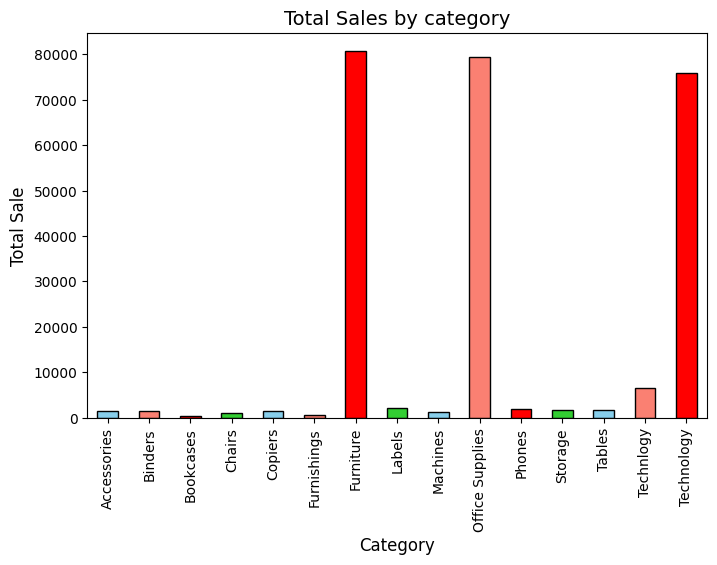

In [81]:
plt.figure(figsize = (8,5))
sales_by_category.plot(kind = "bar",color = ['skyblue','salmon','red','limegreen'],edgecolor = 'black')
plt.title("Total Sales by category",fontsize = 14)
plt.xlabel('Category',fontsize=12)
plt.ylabel('Total Sale',fontsize=12)
plt.show()